In [1]:
suppressMessages(library(dplyr))
suppressMessages(library(tidyr))
suppressMessages(library(stringr))
suppressMessages(library(ggplot2))
suppressMessages(library(ggridges))
suppressMessages(library(ggpubr))

In [2]:
dists_ergolgi = readRDS('/home/ssobti/projects/heterogeneity_brian/notebooks/cell_painting/dists_ergolgi.rds')
dists_cellbody = readRDS('/home/ssobti/projects/heterogeneity_brian/notebooks/cell_painting/dists_cellbody.rds')

In [5]:
dists = rbind(dists_ergolgi, dists_cellbody)

In [7]:
dists$sample_name = factor(dists$sample_name, levels = c('NTCi', 'NTCa', 'HMGA1-CRISPRi', 'MIS18A-CRISPRa', 'MIS18A-CRISPRi', 'RNF8A-CRISPRa', 'RNF8A-CRISPRi', 'RUVBL1-CRISPRi', 'VRK1-CRISPRi'))

samples = dists %>% pull(sample_name) %>% unique() %>% sort()
my_comparisons = list(c(samples[1], samples[3]), c(samples[1], samples[5]), c(samples[1], samples[7]), c(samples[1], samples[8]), c(samples[1], samples[9]))
my_comparisons = lapply(my_comparisons, as.character)
upper_lim = max(dists %>% pull(distances))*1.05

plt1a = dists %>% filter(endsWith(as.character(sample_name), 'i')) %>% ggplot(aes(x=sample_name, y=distances, fill=sample_name)) + theme_pubr() + xlab('') + coord_cartesian(ylim = c(0,6)) + stat_compare_means(method = "t.test", comparisons = my_comparisons, label.y = 3.8, step.increase = 0.03, method.args = list(alternative = "greater")) +
  geom_boxplot(show.legend = FALSE, outlier.shape = NA)+ theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))

In [8]:
dists$sample_name = factor(dists$sample_name, levels = c('NTCi', 'NTCa', 'HMGA1-CRISPRi', 'MIS18A-CRISPRa', 'MIS18A-CRISPRi', 'RNF8A-CRISPRa', 'RNF8A-CRISPRi', 'RUVBL1-CRISPRi', 'VRK1-CRISPRi'))

samples = dists %>% pull(sample_name) %>% unique() %>% sort()
my_comparisons = list(c(samples[2], samples[4]), c(samples[2], samples[6]))
my_comparisons = lapply(my_comparisons, as.character)
upper_lim = max(dists %>% pull(distances))*1.05

plt1b = dists %>% filter(endsWith(as.character(sample_name), 'a')) %>% ggplot(aes(x=sample_name, y=distances, fill=sample_name)) + theme_pubr() + xlab('') + coord_cartesian(ylim = c(0, 4.5)) + stat_compare_means(method = "t.test", comparisons = my_comparisons, label.y = 3.8, step.increase = 0.05, method.args = list(alternative = "less")) +
  geom_boxplot(show.legend = FALSE, outlier.shape = NA)+ theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))

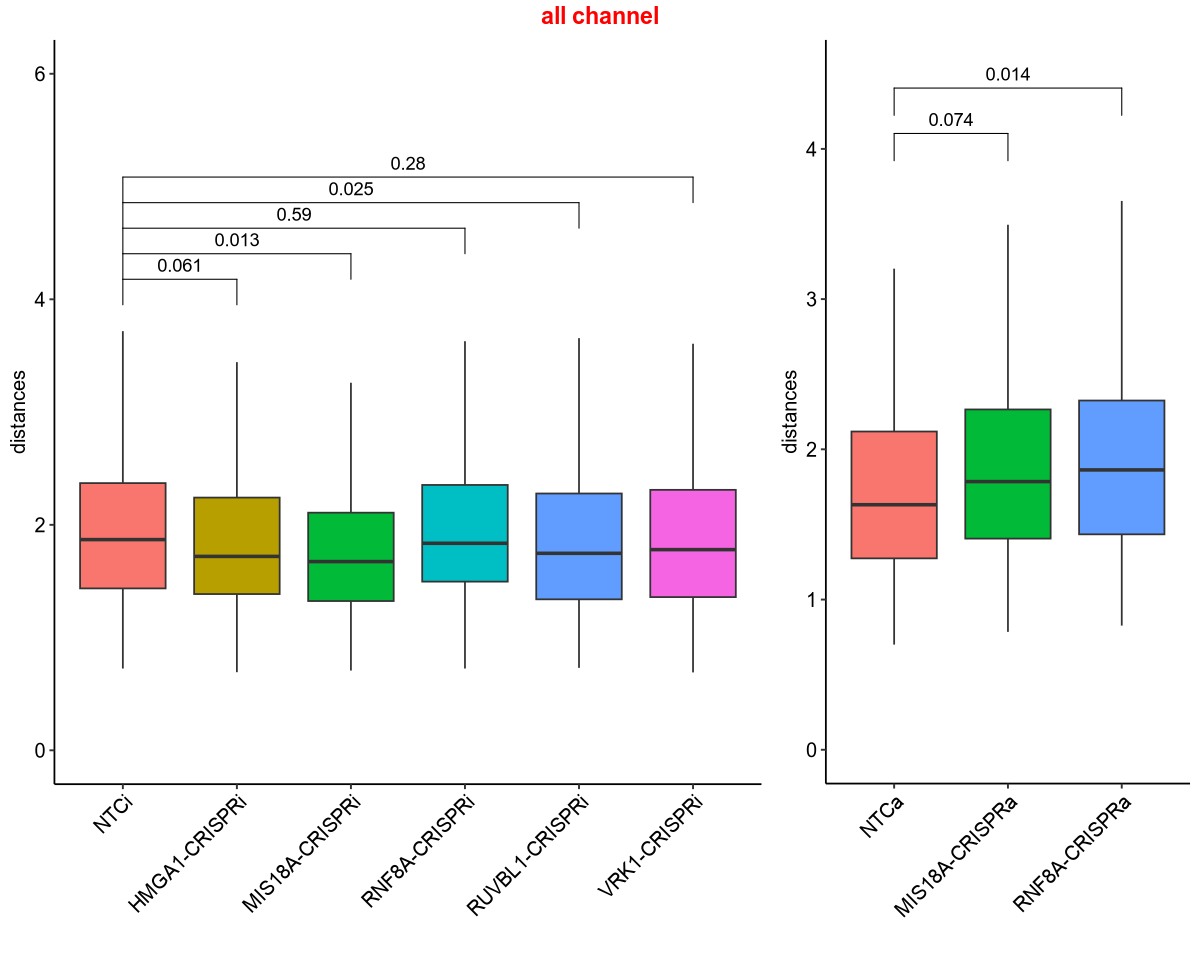

In [10]:
options(repr.plot.width=10, repr.plot.height=8)
annotate_figure(ggarrange(plt1a, plt1b, ncol = 2, widths = c(1.8, 1)), top = text_grob("all channel", color = "red", face = "bold", size = 14))